# Week 6 Mini Project - Loan Eligibility

Dooinn Kim

![Image Description](https://images.unsplash.com/photo-1499750310107-5fef28a66643?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2670&q=80)


### Context

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

### Feature Description

- **Loan_ID**:	Unique Loan ID
- **Gender**:	Male/ Female
- **Married**:	Applicant married (Y/N)
- **Dependents**:	Number of dependents
- **Education**:	Applicant Education (Graduate/ Under Graduate)
- **Self_Employed**:	Self employed (Y/N)
- **Applicant Income**:	Applicant income
- **Coapplicant Income**:	Coapplicant income
- **Loan Amount**:	Loan amount in thousands
- **Loan_Amount_Term**:	Term of loan in months
- **Credit_History**:	credit history meets guidelines
- **Property_Area**:	Urban/ Semi Urban/ Rural
- **Loan_Status**:	(Target) Loan approved (Y/N)


### Project Goal
Using the provided dataset, our study will aim to determine which particular customer profiles are more likely to receive loan approval. Subsequently, we will develop a machine learning model using Logistic Regression, which will automate the binary classification of loan status (approved/denied).

### Project Sequence
1. Import libraries & Load Dataset
2. Overview of Data
3. Data Cleansing
    - 3-1. Remove Duplicates
    - 3-2. Standardization of Headers
    - 3-3. Handling Null Values
4. Exploratory Data Analysis (EDA)
5. Logistic Regression Analysis
    - 5-1. Data Processing
    - 5-2. Data Encoding
    - 5-3. Splitting the Data and Fitting the Model
    - 5-4. Model Building - Logistic Regression
    - 5-5. Model Validation - Confusion Matrix

# 1. Import Libraries & Load Dataset

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [30]:
# Data Source : https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan
df = pd.read_csv('/Users/dooinnkim/ironhack_da_may_2023/week6-miniproject-loan/loan_data.csv')

# 2. Overview of Data

In [31]:
# Check how the dataset looks like
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
#Check the dataset shape 
df.shape

(614, 13)

In [33]:
# Check Data type if Dtype are correctly assinged
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [34]:
# Check the summary of numerical features of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [35]:

df_numeric = df.select_dtypes(include=['float64','int64'])

outliers_dict = {}

for col in df_numeric.columns:
    # Calculate IQR
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers
    outliers = df_numeric[(df_numeric[col] < (Q1 - 1.5 * IQR)) | (df_numeric[col] > (Q3 + 1.5 * IQR))][col]
    
    # Calculate percentage of outliers
    outlier_percentage = round((len(outliers) / len(df_numeric[col]) * 100),2)
    
    # Store results in dictionary and print the number and percentage of outliers for each column
    outliers_dict[col] = {'outliers_count': len(outliers), 'outliers_percentage': outlier_percentage}
    print(col,outliers_dict[col] )


ApplicantIncome {'outliers_count': 50, 'outliers_percentage': 8.14}
CoapplicantIncome {'outliers_count': 18, 'outliers_percentage': 2.93}
LoanAmount {'outliers_count': 39, 'outliers_percentage': 6.35}
Loan_Amount_Term {'outliers_count': 88, 'outliers_percentage': 14.33}
Credit_History {'outliers_count': 89, 'outliers_percentage': 14.5}


In [36]:
# Check unique values in each categorical features

df_categorical = df.select_dtypes(include=['object'])

categorical_lst = list(df_categorical.columns[1:])

for col in categorical_lst:
    print(col, df_categorical[col].unique())


Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [37]:
# Check Null values in each features - Null percentage (%)
(df.isnull().sum()/df.count())*100

Loan_ID              0.000000
Gender               2.163062
Married              0.490998
Dependents           2.504174
Education            0.000000
Self_Employed        5.498282
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.716216
Loan_Amount_Term     2.333333
Credit_History       8.865248
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [38]:
# Any duplicate rows?
df.duplicated().sum()

0

# 3. Data Cleaning

In [39]:
# Drop dupplicated rows
df = df.drop_duplicates()

In [40]:
# Starndardization of headers
list(df.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [41]:
# Starndardization of headers into small cases and replace space to '_'

def standard_header(x):
    return x.lower().replace(' ','_')

df.columns = [standard_header(col) for col in df.columns]


# Rename Column names into for intutive way.

df = df.rename(columns={'applicantincome':'applicant_income',
                            'coapplicantincome':'coapplicant_income',
                            'loanamount':'loan_amount'
                            })




In [42]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
# Convert binary values - Yes and No as object type (for the better presentation in EDA, will later be converted back to 0 and 1 when encoding for data modeling)
df['credit_history'].replace({1.0: 'Yes', 0.0: 'No'}, inplace=True)
df['loan_status'].replace({'Y': 'Yes', 'N': 'No'}, inplace=True)

# We can count applicant_income and co-applicant_income into sum total togeter as one column (like 'total_income')
df['total_income'] = df['applicant_income'] + df['coapplicant_income']


df.drop(columns=['applicant_income', 'coapplicant_income'], inplace=True)

In [44]:
# About dealing with missing values, two different approaches employed - 1.Not considered Target Variabe; 2. Considered Target Variable


na_lst = ['gender','married','dependents','self_employed','credit_history','loan_amount','loan_amount_term']
cats = ['gender','married','dependents','self_employed','credit_history']
num = ['loan_amount','loan_amount_term']


# Approach 1. Target variable (loan_status) not consdiered 
def fill_na1(df):

    for col in na_lst:
    # Categorical Features: Fill NA with most frequetly appeared value - mode
        if col in cats:
            df[col].fillna(df[col].mode()[0], inplace=True)
    # Numerical Features:  Fill NA with median
        elif col in num:
            df[col].fillna(df[col].median(), inplace=True)
    return df



# Approach 2. Targe variable (loan_status) consdiered
def fill_na2(df):

    for col in na_lst:
    # Categorical Features: Fill NA with most frequent loan status count corresponding to NaN values in each category
        if col in cats:
            loan_status_yes = df[df['loan_status'] == 'Yes'].groupby(col).size()
            fill_value = loan_status_yes.idxmax()
            df[col].fillna(fill_value, inplace=True)
    # Numerical Features:  Fill NA with median
        elif col in num:
            df[col].fillna(df[col].median(), inplace=True)
    return df




# First attempt with Approach 1
df = fill_na2(df)



In [45]:
# Finally we've properly dealt with the null values.
(df.isnull().sum()/df.count())*100

loan_id             0.0
gender              0.0
married             0.0
dependents          0.0
education           0.0
self_employed       0.0
loan_amount         0.0
loan_amount_term    0.0
credit_history      0.0
property_area       0.0
loan_status         0.0
total_income        0.0
dtype: float64

In [46]:
# Finally, now the dataset for analysis is ready!!!!
df.head()

,loan_id,gender,married,dependents,education,self_employed,loan_amount,loan_amount_term,credit_history,property_area,loan_status,total_income
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,Yes,Urban,Yes,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,Yes,Rural,No,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,Yes,Urban,Yes,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,Yes,Urban,Yes,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,Yes,Urban,Yes,6000.0


# 4. EDA (Exploratory Data Analysis)

## 4-1 Analysis of Numeric Features

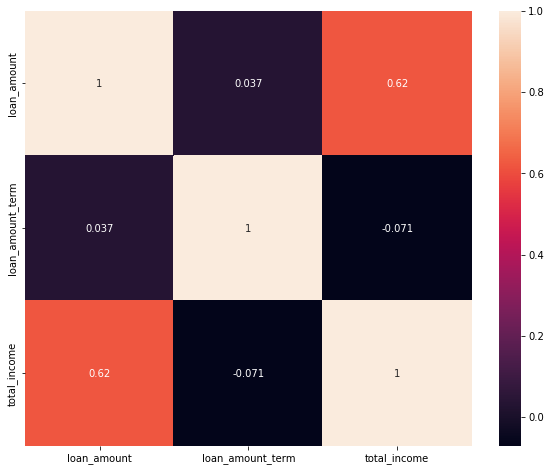

In [47]:
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

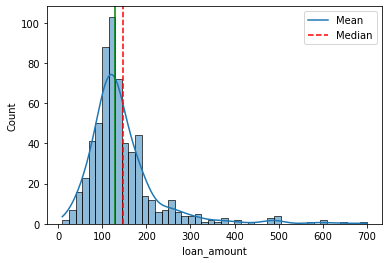

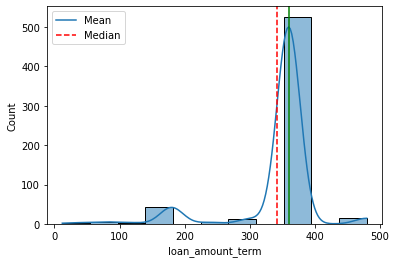

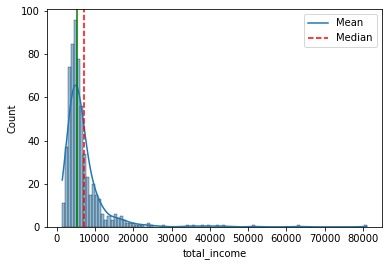

In [48]:
# Check Distribution of Numeric values & skewness
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_numerical = df.select_dtypes(include=['int64','float64'])

for col in df_numerical.columns:
    # Create histogram
    sns.histplot(df_numerical[col], kde=True)
    
    # Calculate mean and median
    mean_value = df_numerical[col].mean()
    median_value = df_numerical[col].median()

    # Add vertical lines for mean and median
    plt.axvline(mean_value, color='r', linestyle='--')
    plt.axvline(median_value, color='g', linestyle='-')

    # Add legend
    plt.legend({'Mean':mean_value,'Median':median_value})

    # Display the plot
    plt.show()



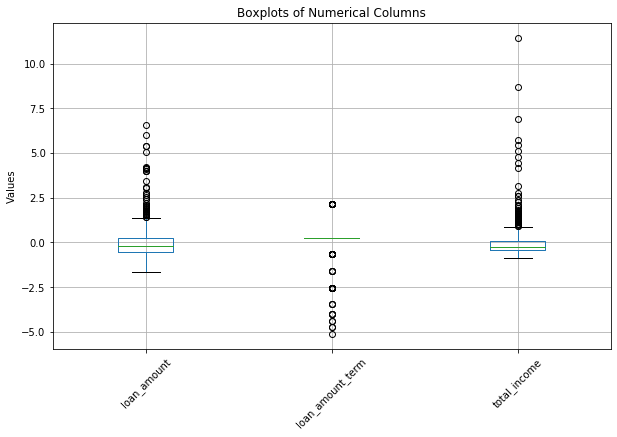

In [49]:
# Check Outliers: for either model improvement or obtaining useful insights from EDA, I want to see how outlieres are comprised on in each columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])


# Using Scaler to reletively see the outliers of all each columns with the numerical values
scaler = StandardScaler()


numeric_df_normalized = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)


numeric_df_normalized.boxplot(figsize=(10, 6))
plt.title("Boxplots of Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)

plt.show()


In [50]:
outliers_dict = {}
for col in df_numerical.columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df_numerical[col].quantile(0.25)
    Q3 = df_numerical[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers
    outliers = df_numerical[(df_numerical[col] < (Q1 - 1.5 * IQR)) | (df_numerical[col] > (Q3 + 1.5 * IQR))][col]

    # Count number of outliers and calculate percentage
    n_outliers = len(outliers)
    percentage = (n_outliers / len(df_numerical)) * 100

    # Add to dictionary
    outliers_dict[col] = {'count': n_outliers, 'percentage': percentage}

# Print the number and percentage of outliers for each column
for col, outlier_info in outliers_dict.items():
    print(f'{col}: {outlier_info["count"]} outliers ({outlier_info["percentage"]:.2f}%)')


loan_amount: 41 outliers (6.68%)
loan_amount_term: 88 outliers (14.33%)
total_income: 50 outliers (8.14%)


In [51]:
# There are fair amount of outliers identified from numeric columns. The suggested approach for machine learning model in dealing with outlieres is binning them.

# Stategy 1. Equal Width Binning - No data distribution relflected

def bin_data_equal(df):
    ranges = {
        'loan_amount': ([0, 100, 200, 300, 400, 500, np.inf], ['0-100', '100-200', '200-300', '300-400', '400-500', '500+']),
        'loan_amount_term': ([0, 100, 200, 300, 400, 500, np.inf], ['0-100', '100-200', '200-300', '300-400', '400-500', '500+']),
        'total_income': ([0, 5000, 10000, 15000, 20000, np.inf], ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000+']),
    }

    for col, (range, labels) in ranges.items():
        df[f'{col}_range'] = pd.cut(df[col], bins=range, labels=labels)

    return df



df = bin_data_equal(df)


Here's a summary of statistical analysis for the numerical features:

### Correlation
- **'total_income'** and **'loan_amount'** are the most correlated numerical features, with a correlation coefficient of 68%.It looks like as higher income, high loan amount request.

### Distribution
- **Total_income**: The mean total income is 7024, indicating a normal distribution with a slight skew to the right. A considerable number of outliers are observed in this feature.
- **Loan_amount**: The average loan amount is 146, which exhibits a near-normal distribution, albeit slightly right-skewed.
- **Loan_amount_term**: The average loan term is 342 days. This feature exhibits a normal distribution with most loan terms concentrated between 300-400 days.
- **Credit_history**: This is a binary feature that only takes 'Yes' or 'No' values.

### Outliers
- A substantial number of outliers have been identified in almost all numerical features. It could be beneficial to investigate how profiles with outliers differ from the rest in terms of loan approval. This will be further explored in the EDA.
- A significant number of outliers were identified in **'loan_amount' (6.68%), 'loan_amount_term' (14.33%)**, and 'total_income' (8.14%). Given the high frequency of outliers, it may not be advisable to remove them before model training as this could lead to significant data loss. An alternative strategy could involve binning these features and converting them into categorical variables for use in model training.

## 4-2. Analysis of Features Relative to the Target Variable

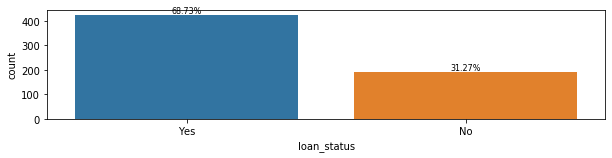

In [52]:
# Target variable: laon status > The follwoing target feature appears the imbalance in data (more yes than No)
plt.figure(figsize=(10, 2))
ax = sns.countplot(x='loan_status', data=df)

total = len(df['loan_status'])
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8)

plt.show()

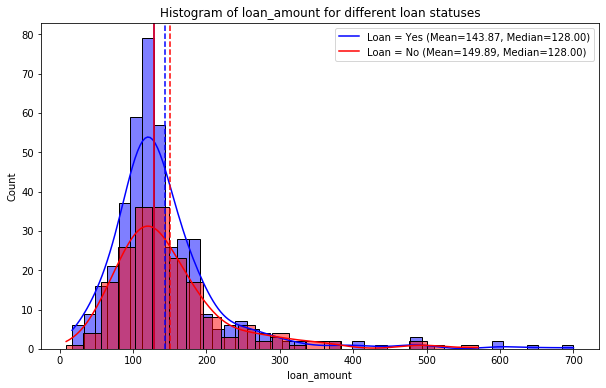

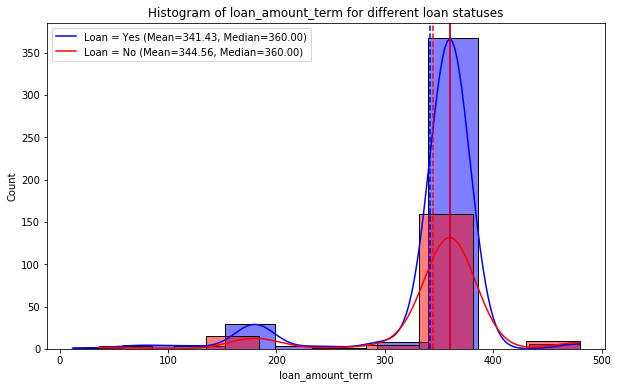

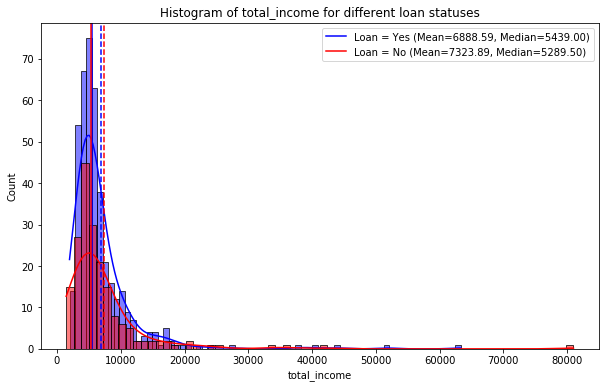

In [53]:
# Are there any differences in numeric features in relation to loan_status?

loan_yes = df[df['loan_status'] == 'Yes']
loan_yes = loan_yes[['loan_amount', 'loan_amount_term', 'total_income']]

loan_no = df[df['loan_status'] == 'No']
loan_no = loan_no[['loan_amount', 'loan_amount_term', 'total_income']]

for col in loan_yes.columns:
    plt.figure(figsize=(10,6))
    
    # Create histogram for loan_yes
    sns.histplot(loan_yes[col], kde=True, color='blue', label='Loan = Yes')
    
    # Create histogram for loan_no
    sns.histplot(loan_no[col], kde=True, color='red', label='Loan = No')
    
    # Calculate mean and median for loan_yes
    mean_value_yes = loan_yes[col].mean()
    median_value_yes = loan_yes[col].median()

    # Calculate mean and median for loan_no
    mean_value_no = loan_no[col].mean()
    median_value_no = loan_no[col].median()

    # Add vertical lines for mean and median for loan_yes
    plt.axvline(mean_value_yes, color='b', linestyle='--')
    plt.axvline(median_value_yes, color='b', linestyle='-')

    # Add vertical lines for mean and median for loan_no
    plt.axvline(mean_value_no, color='r', linestyle='--')
    plt.axvline(median_value_no, color='r', linestyle='-')

    # Add legend with mean and median values
    plt.legend({f'Loan = Yes (Mean={mean_value_yes:.2f}, Median={median_value_yes:.2f})':mean_value_yes, 
                f'Loan = No (Mean={mean_value_no:.2f}, Median={median_value_no:.2f})':mean_value_no})

    # Set title
    plt.title(f'Histogram of {col} for different loan statuses')

    # Display the plot
    plt.show()




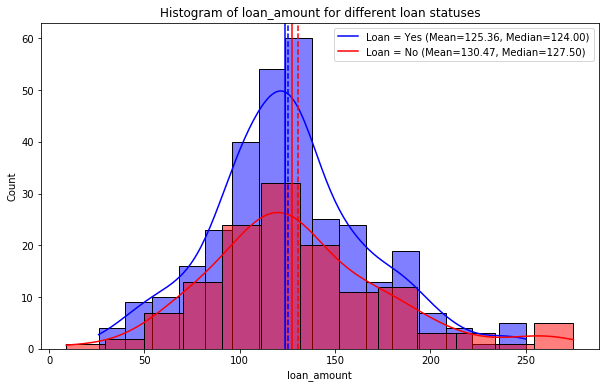

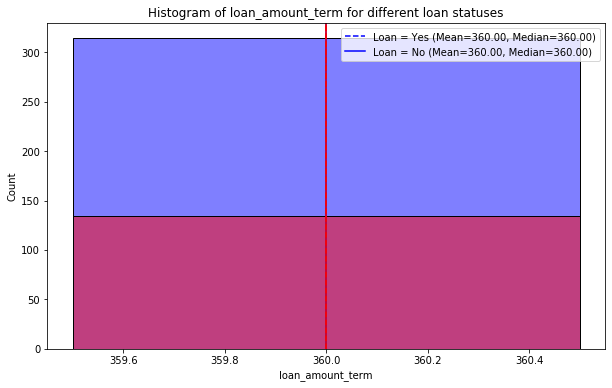

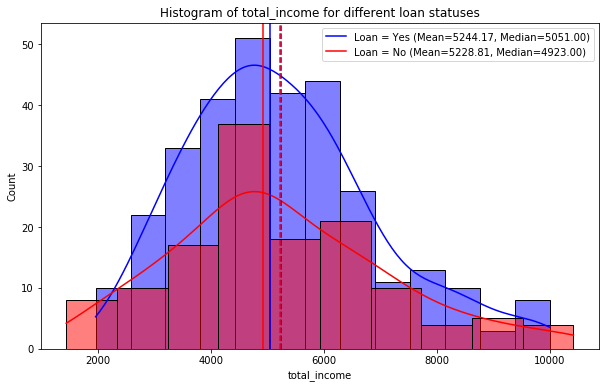

In [54]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df_out

loan_yes = df[df['loan_status'] == 'Yes']
loan_yes = loan_yes[['loan_amount', 'loan_amount_term', 'total_income']]

loan_no = df[df['loan_status'] == 'No']
loan_no = loan_no[['loan_amount', 'loan_amount_term', 'total_income']]

# Remove outliers from each DataFrame
for col in loan_yes.columns:
    loan_yes = remove_outliers(loan_yes, col)
    loan_no = remove_outliers(loan_no, col)

for col in loan_yes.columns:
    plt.figure(figsize=(10,6))
    
    # Create histogram for loan_yes
    sns.histplot(loan_yes[col], kde=True, color='blue', label='Loan = Yes')
    
    # Create histogram for loan_no
    sns.histplot(loan_no[col], kde=True, color='red', label='Loan = No')
    
    # Calculate mean and median for loan_yes
    mean_value_yes = loan_yes[col].mean()
    median_value_yes = loan_yes[col].median()

    # Calculate mean and median for loan_no
    mean_value_no = loan_no[col].mean()
    median_value_no = loan_no[col].median()

    # Add vertical lines for mean and median for loan_yes
    plt.axvline(mean_value_yes, color='b', linestyle='--')
    plt.axvline(median_value_yes, color='b', linestyle='-')

    # Add vertical lines for mean and median for loan_no
    plt.axvline(mean_value_no, color='r', linestyle='--')
    plt.axvline(median_value_no, color='r', linestyle='-')

    # Add legend with mean and median values
    plt.legend({f'Loan = Yes (Mean={mean_value_yes:.2f}, Median={median_value_yes:.2f})':mean_value_yes, 
                f'Loan = No (Mean={mean_value_no:.2f}, Median={median_value_no:.2f})':mean_value_no})

    # Set title
    plt.title(f'Histogram of {col} for different loan statuses')

    # Display the plot
    plt.show()

### Analysis of Numeric Features Relative to the Target Variable
We undertook an analysis to explore potential relationships between numeric features and the target variable. The goal was to identify any significant insights that could emerge when comparing the distribution of these features, considering both the presence and absence of outliers. However, despite rigorous examination, it proved challenging to ascertain if these numeric features wielded considerable influence over loan approval decisions.

loan_status,No,Yes
gender,,
Female,37,75
Male,155,347


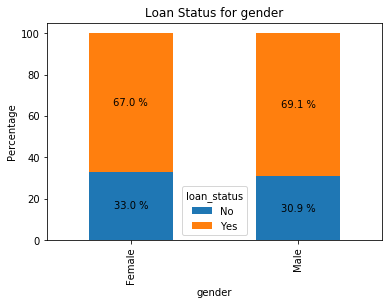

loan_status,No,Yes
married,,
No,79,134
Yes,113,288


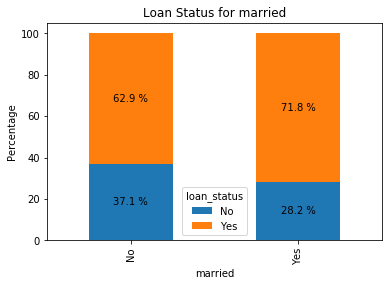

loan_status,No,Yes
dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33


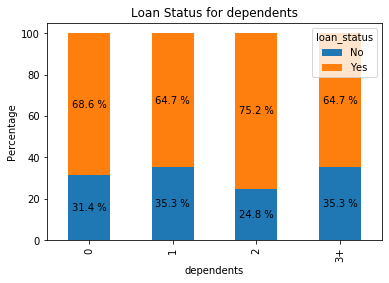

loan_status,No,Yes
education,,
Graduate,140,340
Not Graduate,52,82


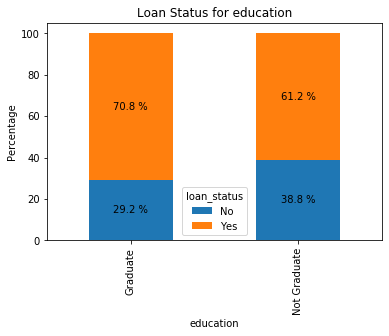

loan_status,No,Yes
self_employed,,
No,166,366
Yes,26,56


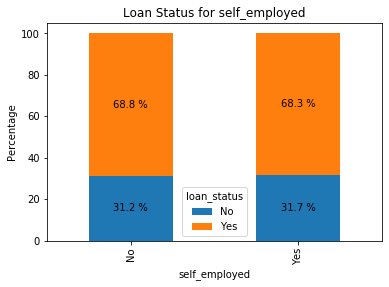

loan_status,No,Yes
credit_history,,
No,82,7
Yes,110,415


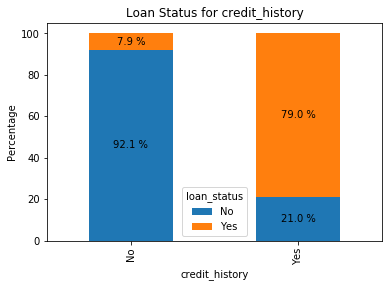

loan_status,No,Yes
property_area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


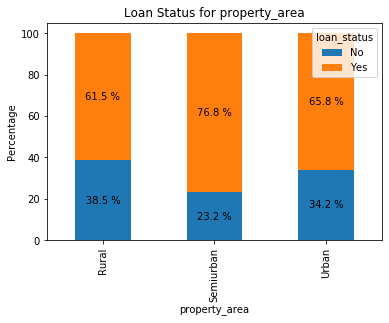

loan_status,No,Yes
loan_amount_range,,
0-100,47,107
100-200,114,266
200-300,19,32
300-400,8,7
400-500,3,6
500+,1,4


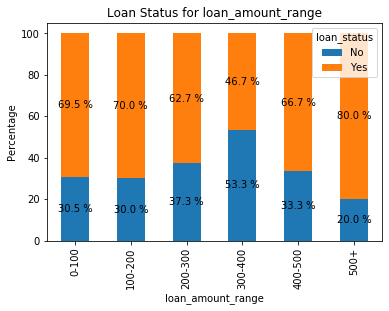

loan_status,No,Yes
loan_amount_term_range,,
0-100,3,6
100-200,15,32
200-300,6,11
300-400,159,367
400-500,9,6


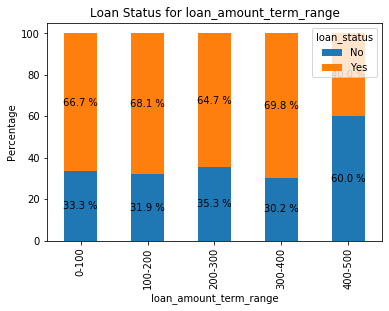

loan_status,No,Yes
total_income_range,,
0-5000,89,181
5000-10000,74,183
10000-15000,15,36
15000-20000,5,13
20000+,9,9


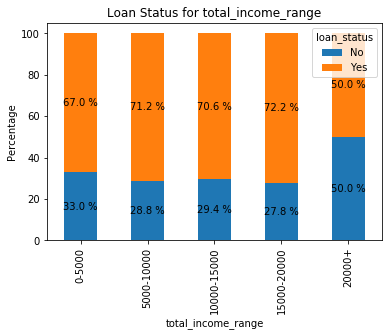

In [55]:
category_ls = ['gender', 'married', 'dependents', 'education',
       'self_employed', 'credit_history', 'property_area',
       'loan_amount_range', 'loan_amount_term_range', 'total_income_range']

for col in category_ls:

    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['loan_status'])

    row_sums = contingency_table.sum(axis=1)
    contingency_table_per = contingency_table.div(row_sums, axis=0) * 100

    display(contingency_table)
    
    # Plot the bar chart
    ax = contingency_table_per.plot(kind='bar', stacked=True)
    plt.ylabel('Percentage')
    plt.title('Loan Status for ' + col)

    # Adding percentages to the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.1f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
    plt.show()


### Analysis of Categorical Features Relative to the Target Variable

While the dataset shows certain imbalances in various categorical features, the following is a rough interpretation of the feature analysis:

- **Gender**: The chance of loan approval doesn't appear to display substantial disparity between females and males, suggesting that gender may not be a significant factor in the loan approval decision.
- **Marital Status**: Married applicants have a slightly higher likelihood (71%) of receiving loan approval compared to those who are not married (63%). However, the correlation seems to have minimal impact on loan approval.
- **Dependents**: Applicants with two dependents seem to have a slightly increased probability of loan approval.
- **Education**: Graduates demonstrate a better chance of securing loan approval (71%) than non-graduates (61%).
- **Employment Status**: The employment status of the applicant doesn't appear to significantly impact the approval of loans.
- **Credit History**: The availability of credit history has a substantial impact on loan approval, indicating that having a credit history is critical for loan approval (Yes - 79%, No - 8%).
- **Property Area**: Based on proportions, living in a semi-urban area may slightly enhance the probability of loan approval, although the significance seems minimal.
- **Loan Amount Range**: The most frequently approved loan amounts are between 400 and 500 (89%), and 0 and 100 (74%). Requesting a loan within these ranges could possibly enhance the chances of approval.
- **Loan Term Range**: Regarding the term of repayment, ranges of 0-100 days (89%), 200-300 days (79%), and 100-200 days (77%) are commonly associated with loan approval.
- **Income Range**: (Interpretation is not provided due to lack of provided data)

In conclusion, applicants who are married, have two dependents, are graduates, possess a credit history, reside in a semi-urban area, and seek a loan amount between 400-500 or 0-100 for a term of 0-300 days are more likely to receive loan approval. Importantly, the availability of credit history is the most critical factor in obtaining loan approval.

# 5. Data Processing

In [56]:
# copy df for data modeeling
df_modeling = df.copy()


# loan_id will be excluded in modeling
df_modeling = df_modeling.drop(columns=['loan_id','loan_amount_range','loan_amount_term_range','total_income_range'])
df_modeling.head()

,gender,married,dependents,education,self_employed,loan_amount,loan_amount_term,credit_history,property_area,loan_status,total_income
0,Male,No,0,Graduate,No,128.0,360.0,Yes,Urban,Yes,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,Yes,Rural,No,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,Yes,Urban,Yes,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,Yes,Urban,Yes,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,Yes,Urban,Yes,6000.0


In [57]:
X = df_modeling.drop('loan_status', axis=1)
y = df_modeling['loan_status']

In [58]:
X = pd.get_dummies(X, columns=['gender', 'married', 'dependents', 'education',
       'self_employed', 'credit_history', 'property_area'])
X

,loan_amount,loan_amount_term,total_income,gender_Female,gender_Male,married_No,married_Yes,dependents_0,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,credit_history_No,credit_history_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,128.0,360.0,5849.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,128.0,360.0,6091.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0
2,66.0,360.0,3000.0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1
3,120.0,360.0,4941.0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1
4,141.0,360.0,6000.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.0,360.0,2900.0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0
610,40.0,180.0,4106.0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0
611,253.0,360.0,8312.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
612,187.0,360.0,7583.0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1


In [59]:
pd.get_dummies(df_modeling).corr()["loan_status_Yes"].sort_values(ascending=False)

loan_status_Yes            1.000000
credit_history_Yes         0.540556
property_area_Semiurban    0.136540
married_Yes                0.091478
education_Graduate         0.085884
dependents_2               0.062384
gender_Male                0.017987
self_employed_No           0.003700
dependents_0              -0.003044
self_employed_Yes         -0.003700
gender_Female             -0.017987
loan_amount_term          -0.022549
dependents_3+             -0.026123
total_income              -0.031271
loan_amount               -0.033214
dependents_1              -0.038740
property_area_Urban       -0.043621
education_Not Graduate    -0.085884
married_No                -0.091478
property_area_Rural       -0.100694
credit_history_No         -0.540556
loan_status_No            -1.000000
Name: loan_status_Yes, dtype: float64

In [60]:
pd.get_dummies(df_modeling).corr()["loan_status_No"].sort_values(ascending=False)

loan_status_No             1.000000
credit_history_No          0.540556
property_area_Rural        0.100694
married_No                 0.091478
education_Not Graduate     0.085884
property_area_Urban        0.043621
dependents_1               0.038740
loan_amount                0.033214
total_income               0.031271
dependents_3+              0.026123
loan_amount_term           0.022549
gender_Female              0.017987
self_employed_Yes          0.003700
dependents_0               0.003044
self_employed_No          -0.003700
gender_Male               -0.017987
dependents_2              -0.062384
education_Graduate        -0.085884
married_Yes               -0.091478
property_area_Semiurban   -0.136540
credit_history_Yes        -0.540556
loan_status_Yes           -1.000000
Name: loan_status_No, dtype: float64

In [61]:
# Train-test split: X-y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Logistics Regression Analysis

In [62]:
classification = LogisticRegression(random_state=42)
classification.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [63]:
# Accuracy Classification Score
classification.score(X_test, y_test)

0.7886178861788617

In [64]:
predictions = classification.predict(X_test)
predictions

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
      dtype=object)

In [65]:
#Check the proba of predictions: the model does not seem overfitted
predictions_ = classification.predict_proba(X_test)
predictions_

array([[0.09996287, 0.90003713],
       [0.0765641 , 0.9234359 ],
       [0.15424078, 0.84575922],
       [0.36361557, 0.63638443],
       [0.15376233, 0.84623767],
       [0.18255417, 0.81744583],
       [0.05980467, 0.94019533],
       [0.13834941, 0.86165059],
       [0.25494972, 0.74505028],
       [0.16528654, 0.83471346],
       [0.55912256, 0.44087744],
       [0.18431922, 0.81568078],
       [0.12032144, 0.87967856],
       [0.2130046 , 0.7869954 ],
       [0.12598519, 0.87401481],
       [0.13629908, 0.86370092],
       [0.27770635, 0.72229365],
       [0.19454026, 0.80545974],
       [0.08670845, 0.91329155],
       [0.05211341, 0.94788659],
       [0.1494452 , 0.8505548 ],
       [0.08135179, 0.91864821],
       [0.09783785, 0.90216215],
       [0.10004136, 0.89995864],
       [0.38805117, 0.61194883],
       [0.41627753, 0.58372247],
       [0.2723374 , 0.7276626 ],
       [0.17075225, 0.82924775],
       [0.28427573, 0.71572427],
       [0.10903085, 0.89096915],
       [0.

In [66]:
# check the degree of imbalance in test samples (see definition of imbalanced data: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data#:~:text=A%20classification%20data%20set%20with,smaller%20proportion%20are%20minority%20classes.)
y_test.value_counts()

Yes    80
No     43
Name: loan_status, dtype: int64

In [67]:
value_counts = y_test.value_counts()

# Calculate the proportion of the minority class
minority_proportion = round((value_counts.min() / value_counts.sum() * 100),2)

print(minority_proportion,'%')

# Determine the degree of imbalance based on the proportion
if minority_proportion >= 20:
    print('a mild degree of imbalance.')
elif minority_proportion >= 1:
    print('a moderate degree of imbalance.')
else:
    print('an extreme degree of imbalance.')


34.96 %
a mild degree of imbalance.


In [68]:
confusion_matrix(y_test, predictions)

array([[18, 25],
       [ 1, 79]])

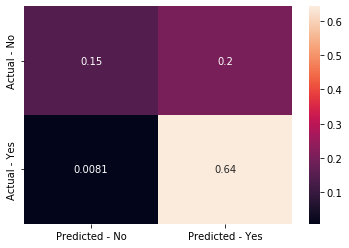

In [69]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["Predicted - No", "Predicted - Yes"], yticklabels=["Actual - No", "Actual - Yes"])
plt.show()

In [70]:
! pip install imblearn

In [71]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)

X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train) 

y_train_balanced.value_counts()

No     342
Yes    342
Name: loan_status, dtype: int64

In [72]:
classification = LogisticRegression(random_state=42) #, max_iter=1000
classification.fit(X_train_balanced, y_train_balanced)
classification.score(X_test, y_test)

0.7154471544715447

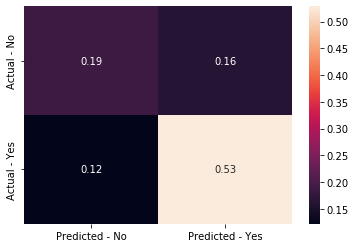

In [73]:
predictions = classification.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')

sns.heatmap(cf_matrix, annot=True, xticklabels=["Predicted - No", "Predicted - Yes"], yticklabels=["Actual - No", "Actual - Yes"])

plt.show()

### Method 1. Missing Values (approach 1), Equal Width Binning Outliers
Classification Score: 0.79 (balanced: 0.71)
### Method 2. Missing Values (approach 2), Equal Width  Binning Outliers
Classification Score: 0.79 (balanced: 0.71)
### Method 3. Missing Values (approach 1), No Binning Outliers
Classification Score: 0.78 (balanced: 0.71)
### Method 4. Missing Values (approach 2), No Binning Outliers
Classification Score: 0.78 (balanced: 0.71)